In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [37]:
df="/kaggle/input/isic-2024-challenge/train-image/image"
df2=pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")
df2=df2.drop(columns=["isic_id","patient_id","lesion_id","copyright_license","iddx_2","iddx_3","iddx_4","iddx_5","mel_mitotic_index","mel_thick_mm"])
df2["age_approx"]=df2["age_approx"].fillna(0)
df2[["sex","anatom_site_general"]]=df2[["sex","anatom_site_general"]].fillna("Nil")

/tmp/ipykernel_33/3597404915.py:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")


In [38]:
df2.sample()

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,iddx_full,iddx_1,tbp_lv_dnn_lesion_confidence
255078,0,50.0,male,posterior torso,5.98,TBP tile: close-up,3D: XP,17.533738,14.686161,24.853766,...,3.096892,0.224939,120,-45.102753,1243.609253,198.166565,ACEMID MIA,Benign,Benign,99.947888


In [39]:
# df2.columns

In [40]:
len(df2)

401059

In [41]:
one_hot=OneHotEncoder(sparse_output=False)
one=one_hot.fit_transform(df2[["sex","anatom_site_general","image_type","tbp_tile_type","tbp_lv_location","tbp_lv_location_simple","attribution","iddx_full","iddx_1"]])
one=pd.DataFrame(one,columns=one_hot.get_feature_names_out())

In [42]:
# df2["tbp_lv_location_simple"]

In [48]:
concaty=pd.concat([df2,one],axis=1)
concaty=concaty.drop(columns=["sex","anatom_site_general","image_type","tbp_tile_type","tbp_lv_location","tbp_lv_location_simple","attribution","iddx_full","iddx_1"])
concaty

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Superficial spreading",iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Lentigo maligna type","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Superficial spreading","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, associated with a nevus",iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma metastasis,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma, NOS",iddx_1_Benign,iddx_1_Indeterminate,iddx_1_Malignant
0,0,60.0,3.04,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,60.0,1.10,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,60.0,3.40,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,65.0,3.22,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,55.0,2.73,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,0,70.0,6.80,22.574335,14.944666,27.663259,26.767135,35.705132,30.656525,50.784168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401055,0,60.0,3.11,19.977640,16.026870,34.158840,31.011870,39.571870,34.908400,59.678970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401056,0,65.0,2.05,17.332567,12.364397,29.845326,26.500073,34.513206,29.242644,59.854275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401057,0,30.0,2.80,22.288570,9.564721,28.431200,27.012250,36.126360,28.655640,51.905420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
X=concaty.drop(columns=["target"])
Y=concaty[['target']]

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [58]:
random_classif=RandomForestClassifier()
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

/tmp/ipykernel_33/1617334547.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_classif.fit(X_train,Y_train)


1.0

In [59]:
y_pred=random_classif.predict(X_test)

In [63]:
len(Y_test)

80212

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

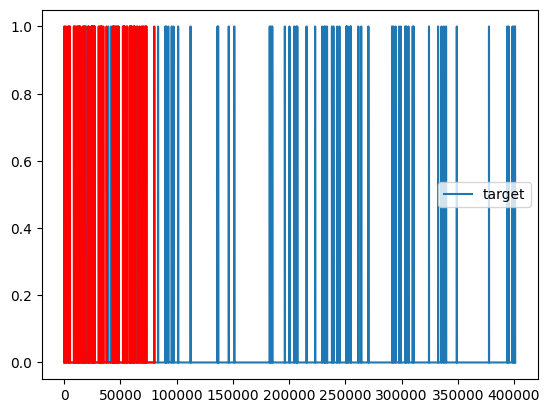

In [62]:
sns.lineplot(Y_test)
sns.lineplot(y_pred,color="red")

In [71]:
len(X_test.columns)

138

In [ ]:
for col in X_test.columns:
    if col in X_test.columns:
        plt.title(f" violinplot between X_test({col}) and y_pred")
        sns.histplot(X_test[col])
        sns.histplot(y_pred)
        plt.show()
    else:
        print("Not Found")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Axes: ylabel='Density'>

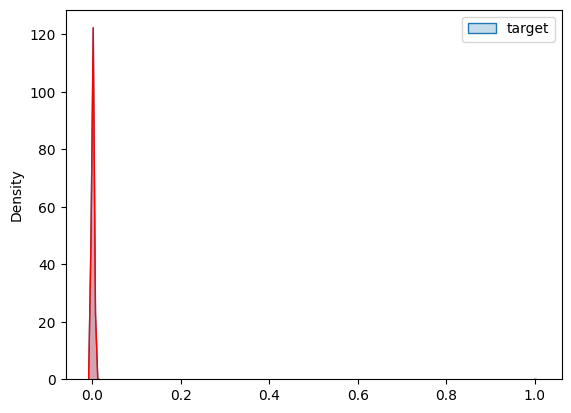

In [76]:
sns.kdeplot(Y_test,fill="shade")
sns.kdeplot(y_pred,color="red",fill="shade")

(-0.05, 0.05)

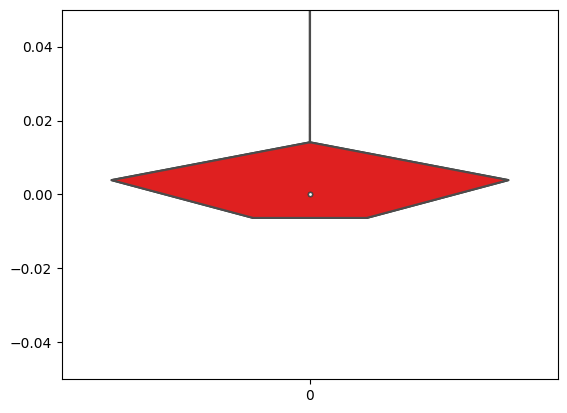

In [86]:
sns.violinplot(Y_test,color="purple")
sns.violinplot(y_pred,color="red")
plt.ylim(-0.05,0.05)